# Importation des librairies

In [303]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer,make_column_selector

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer






# Importation des donnees

In [304]:
laptop = pd.read_csv('laptop_data.csv')
laptop.head(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


In [305]:
laptop.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [306]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [307]:
laptop.drop("Unnamed: 0",axis=1,inplace=True)

In [308]:
laptop.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [309]:
laptop['Gpu'].mode().value_counts()

Gpu
Intel HD Graphics 620    1
Name: count, dtype: int64

<Axes: >

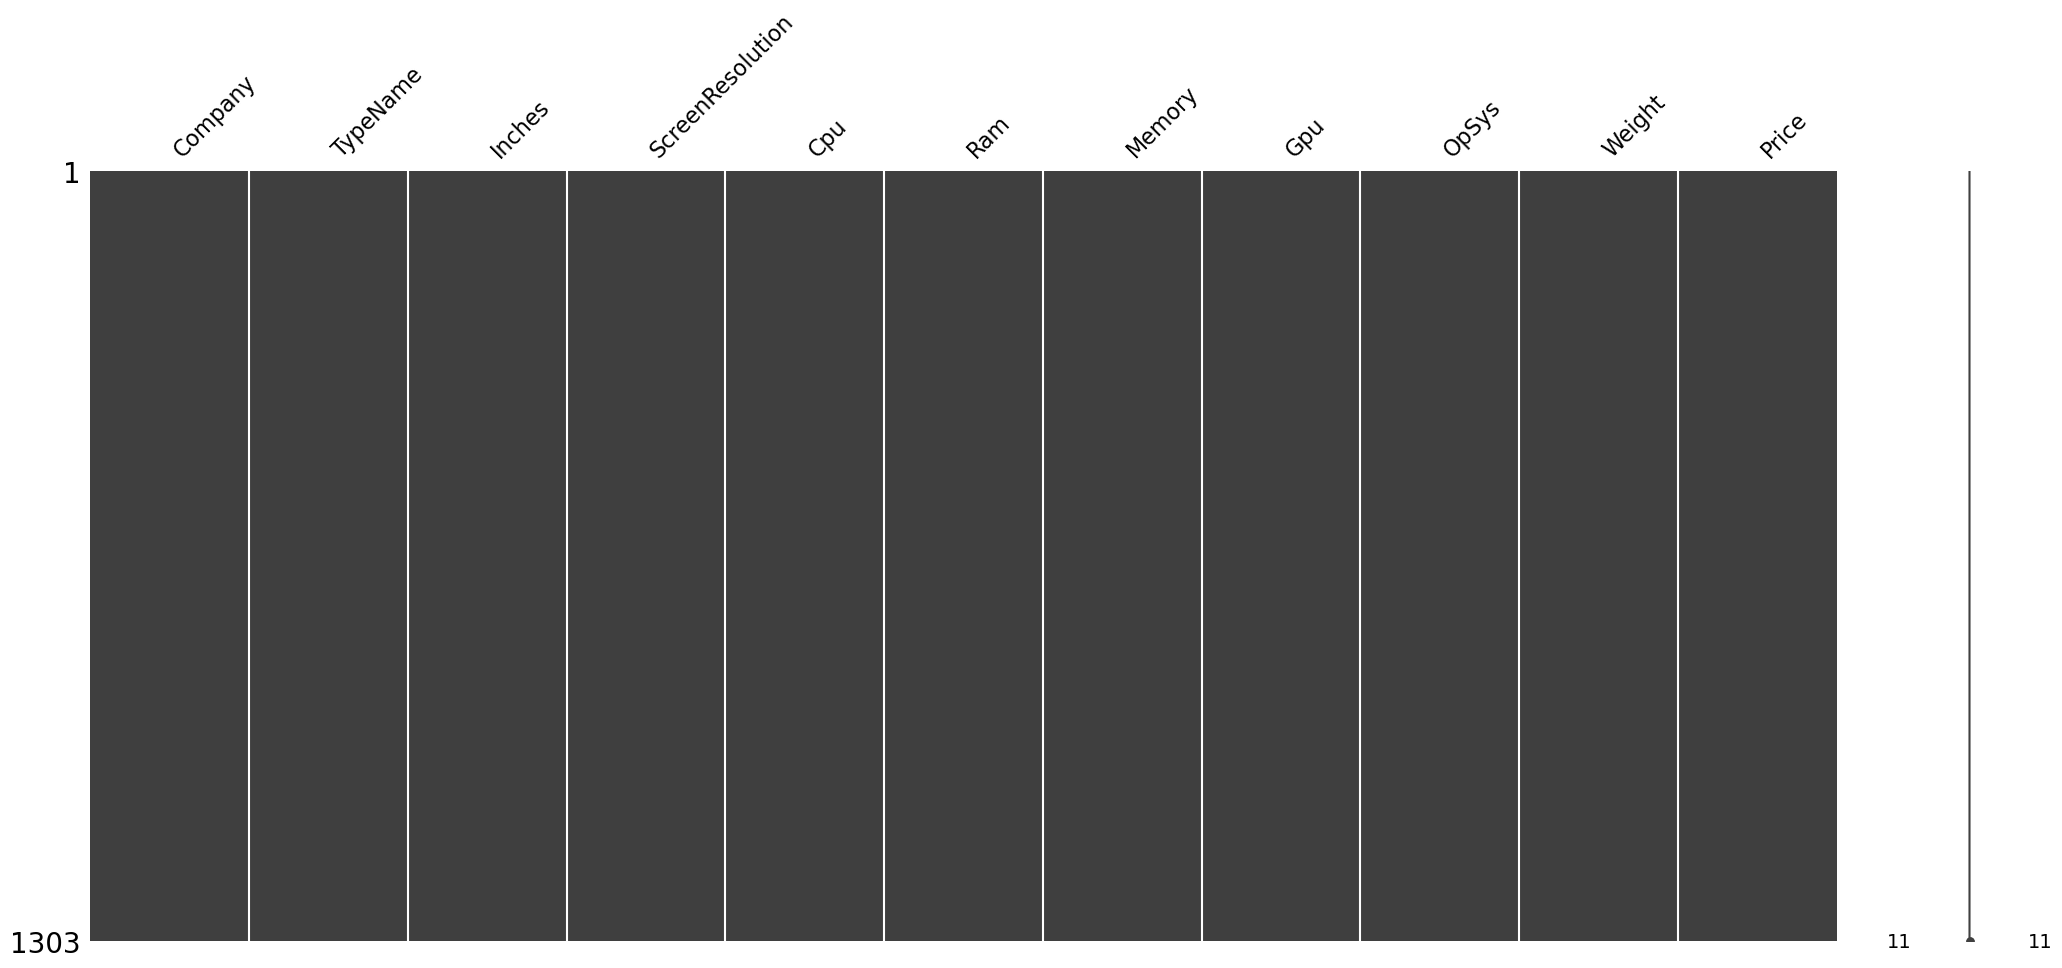

In [310]:
mns.matrix(laptop)

In [311]:
#sns.catplot(data=laptop,x='TypeName',y='Price')

In [312]:
#sns.boxplot(data=laptop,y='Price')

In [313]:
laptop['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [314]:
laptop['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [315]:
laptop['Ram'] = laptop['Ram'].str.replace('GB','').astype(float)

laptop['Weight'] = laptop['Weight'].str.replace('kg','').astype(float)


In [316]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   float64
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(4), object(7)
memory usage: 112.1+ KB


In [317]:
#Resolution de l'ecran
laptop["Touchscreen"] = laptop["ScreenResolution"].apply(lambda element: 1 if "Touchscreen"  in element else 0)
laptop

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0


In [318]:
#Colonne de Resolution de l'ecran 'IPS'
laptop["IPS"] = laptop["ScreenResolution"].apply(lambda element: 1 if "IPS"  in element else 0)
laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [319]:
#Extraction de la largeur de resolution

ext = laptop["ScreenResolution"].str.split('x', n=1, expand=True)
laptop['lar_res'] = ext[0]
laptop['long_res'] = ext[1]
laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,lar_res,long_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [320]:
laptop['lar_res'] = laptop['lar_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
laptop['lar_res'] = laptop['lar_res'].astype(int)
laptop['long_res'] = laptop['long_res'].astype(int)
laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,lar_res,long_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [321]:
#calcule de la densité de pixels par pouce (PPI, pour "Pixels Per Inch") de l'écran

laptop["PPP"] = (((laptop['lar_res']**2+laptop['long_res']**2)**0.5)/laptop['Inches']).astype('float')
laptop.drop(columns=['ScreenResolution','lar_res','long_res'],inplace=True)
laptop.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPP
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [322]:
#Colonne de CPU
laptop["Type_cpu"] = laptop["Cpu"].apply(lambda text:" ".join(text.split()[:3]))
laptop.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPP,Type_cpu
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [323]:
def typeprocesseur(text):
    if text=="Intel Core i7" or text=="Intel Core i5" or text=="Intel Core i3":
        return text
    else:
        if text.split()[0]=="Intel":
            return "Autre type cpu"
        else:
            return "AMD"
laptop["Type_cpu"] = laptop["Type_cpu"].apply(lambda text:typeprocesseur(text))
laptop.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPP,Type_cpu
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [324]:
#laptop_cleaned['Cpu_frequence']=laptop_cleaned['Cpu'].str[-6:]
laptop['Cpu_frequence'] = laptop['Cpu'].str.extract(r'(\d+\.\d+GHz)')

laptop['Cpu_frequence'] = laptop['Cpu_frequence'].str.replace('GHz','').astype(float)
#laptop['Cpu_without_frequence'] = laptop['Cpu'].str[:-6]
laptop.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPP,Type_cpu,Cpu_frequence
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,2.3
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,1.8
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,2.5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,2.7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,3.1


In [325]:
laptop.drop('Cpu', axis=1, inplace=True)

In [330]:
laptop['Memory_capacity1'] = laptop['Memory'].str.extract(r'(\d+)').astype(float)

In [331]:
# Convertir les TB en GB en multipliant les TB par 1024

def adjust_memory(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: x * 1024 if x < 9 else x)
    return df
# Application de le fonction de conversion

laptop = adjust_memory(laptop, 'Memory_capacity1')

In [333]:
laptop.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPP,Type_cpu,Cpu_frequence,Memory_capacity,Memory_capacity1
0,Apple,Ultrabook,13.3,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,2.3,128.0,128.0
1,Apple,Ultrabook,13.3,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,1.8,128.0,128.0
2,HP,Notebook,15.6,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,2.5,256.0,256.0
3,Apple,Ultrabook,15.4,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,2.7,512.0,512.0
4,Apple,Ultrabook,13.3,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,3.1,256.0,256.0


In [302]:
y = laptop_cleaned['Price']
X = laptop_cleaned.drop('Price', axis=1)

NameError: name 'laptop_cleaned' is not defined

In [ ]:
laptop_cat = []
laptop_num = []
for i, c in enumerate(laptop_cleaned.dtypes):
    if c == object:
        laptop_cat.append(laptop_cleaned.iloc[:,i])
    else:
        laptop_num.append(laptop_cleaned.iloc[:,i])

In [ ]:
laptop_cat = pd.DataFrame(laptop_cat).transpose()
laptop_num = pd.DataFrame(laptop_num).transpose()

In [ ]:
#laptop_num = make_column_selector(dtype_include=np.number)
#laptop_cat = make_column_selector(dtype_exclude=np.number)

In [ ]:
#numerical_pipeline = make_pipeline(SimpleImputer(),
                                  #StandardScaler())
#categorical_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'),
                                    #OneHotEncoder())

In [ ]:
#preposessor = make_column_transformer((numerical_pipeline,laptop_num),
                                      #categorical_pipeline, laptop_cat)

In [ ]:
#model = make_pipeline(preposessor,SGDRegressor())
#model.fit(X, y)

In [ ]:
laptop_cat

In [ ]:
# Extraction des types de disque de stockage

laptop_cat['Memory_type'] = laptop_cat['Memory'].str.extract(r'(SSD|HDD|Flash Storage|Hybrid)').astype(str)
laptop_cat['Memory_type'].unique()

In [ ]:
# Recodage des disques

Memory = {
    'HDD':1,
    'Flash Storage':3,
    'Hybrid':2,
    'SSD':4
}

laptop_num['Memory_type'] = laptop_cat['Memory_type'].map(Memory).astype(float)

In [ ]:
laptop_cat

In [ ]:
laptop_cat.drop('Memory',axis=1, inplace=True)
laptop_cat.drop('Memory_type',axis=1, inplace=True)
laptop_cat

In [ ]:
y = laptop_num['Price']
laptop_num.drop('Price', axis=1, inplace=True)
#laptop_num.drop('Unnamed',axis=1, inplace=True)
X = pd.concat([laptop_cat,laptop_num],axis=1)
X = X[['Cpu_without_frequence','Weight','Ram','Cpu_frequence','Memory_capacity','Memory_type']]

In [ ]:
X

In [ ]:
# Sélectionner uniquement les colonnes qualitatives (object ou category)
categorical_columns = X.select_dtypes(include=['object', 'category']).columns

# Créer un ColumnTransformer pour encoder ces colonnes
transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'  # Laisser les autres colonnes inchangées
)

# Appliquer le transformateur
laptop_encoded = transformer.fit_transform(X)


In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=111)

In [ ]:
# Identifier les colonnes qualitatives
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Créer un transformateur pour l'encodage
column_transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'  # Garder les autres colonnes telles quelles
)

# Appliquer l'encodage
X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)



In [ ]:
print(X_train[:5])  # Affiche les 5 premières lignes
print(type(X_train))  # Confirme le type de données (devrait être un tableau NumPy)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

# Identification et traitement des valeurs aberantes

In [ ]:
#Fonction de detection des valeurs aberantes (outliers)

def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)  # Premier quartile
    Q3 = dataframe[column].quantile(0.75)  # Troisième quartile
    IQR = Q3 - Q1  # Intervalle interquartile
    borne_inf = Q1 - 1.5 * IQR  # Limite inférieure
    borne_sup = Q3 + 1.5 * IQR  # Limite supérieure

    # Filtrer les lignes sans outliers
    dataframe_cleaned = dataframe[(dataframe[column] >= borne_inf) & (dataframe[column] <= borne_sup)]
    return dataframe_cleaned


In [ ]:
#Application de la fonction sur la variable prix

laptop_cleaned = remove_outliers_iqr(laptop, 'Price')

# Afficher les dimensions avant et après suppression
print(f"Taille initiale : {laptop.shape}")
print(f"Taille après suppression des outliers : {laptop_cleaned.shape}")
